## Data Visualization and Analysis

#### Load Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
from IPython.core.pylabtools import figsize
from statistical_methods import Statistics
from scipy.stats import ttest_ind

In [2]:
x = pd.read_csv('student-mat.csv')
df = x.copy()

### Distribution of Different Genders Between Different Schools

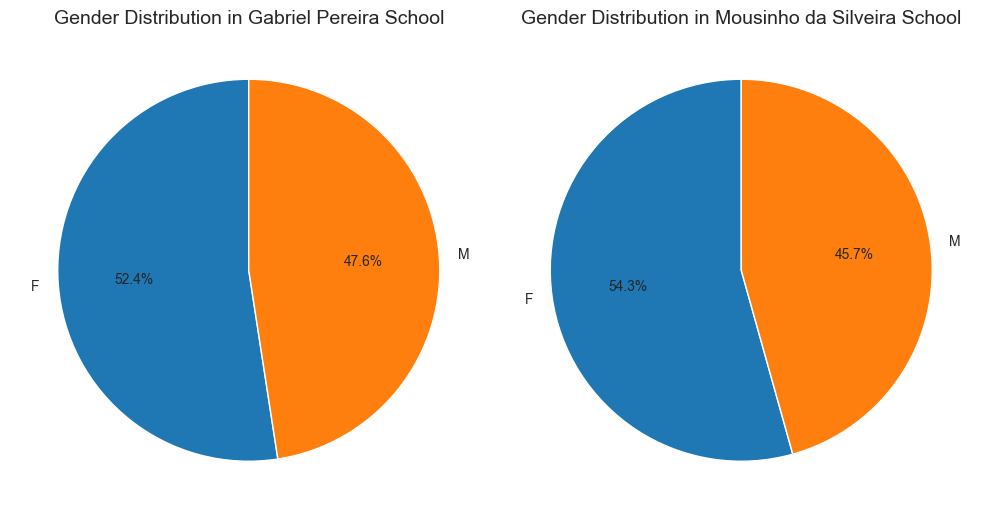

Gabriel Pereire School, Male Count:166, Female Count:183          Mousinho da Silveira School, Male Count:21, Female Count:25


In [3]:
gp = df[df['school'] == 'GP'].copy()
ms = df[df['school'] == 'MS'].copy()

gppie = gp.groupby('sex').size()
mspie = ms.groupby('sex').size()

fig, axes = plt.subplots(1,2, figsize=(10,6))

gppie.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], startangle=90)
axes[0].set_title('Gender Distribution in Gabriel Pereira School', fontsize=14)

mspie.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], startangle=90)
axes[1].set_title('Gender Distribution in Mousinho da Silveira School', fontsize=14)

plt.tight_layout()
plt.show()

zgp = gp.groupby('sex').size()
zms = ms.groupby('sex').size()

msmale, msfemale = zms['M'], zms['F'] 
gpmale, gpfemale = zgp['M'], zgp['F']

print(f'Gabriel Pereire School, Male Count:{gpmale}, Female Count:{gpfemale}          Mousinho da Silveira School, Male Count:{msmale}, Female Count:{msfemale}')


### Study Hour's Affect on Performance

<Figure size 1300x700 with 0 Axes>

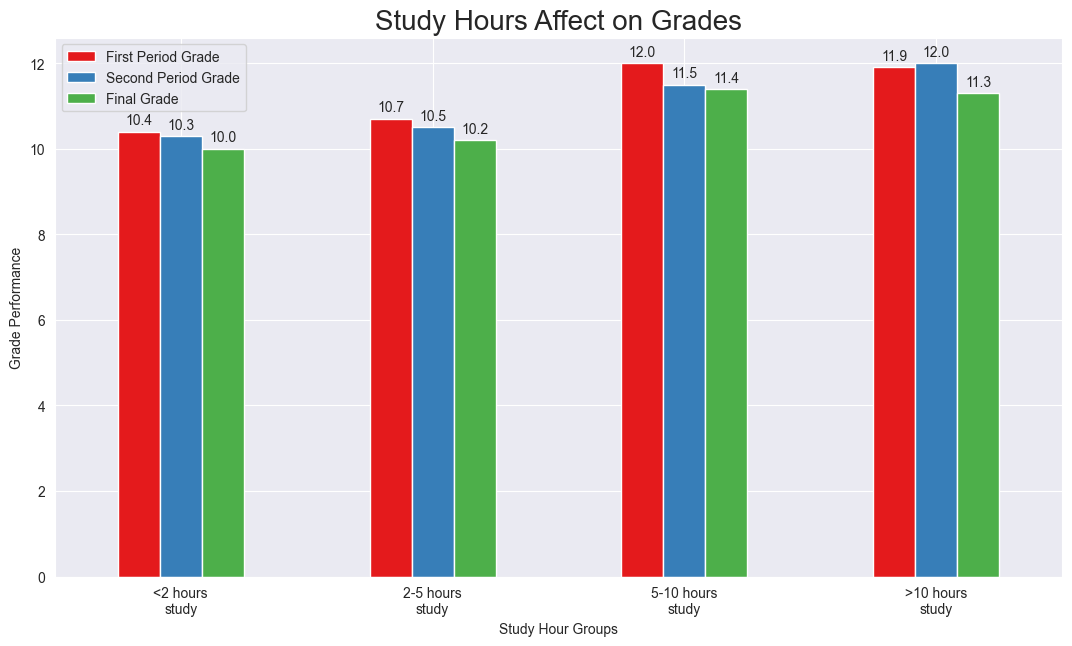

The pearson correlation coefficient is: 0.098
Very weak or no correlation: The variables do not have a meaningful linear relationship.


In [6]:
x = df.groupby('studytime')[['G1', 'G2', 'G3']].mean().round(1).reset_index()
x.columns = ['Study Time', 'First Period Grade', 'Second Period Grade','Final Grade']


def change_numbers(x):
    if x == 1: 
        return '<2 hours'
    elif x == 2:
        return '2-5 hours'
    elif x == 3:
        return '5-10 hours'
    else:
        return '>10 hours'

x['Study Time'] = x['Study Time'].apply(change_numbers)

colors = sns.color_palette('Set1')
plt.figure(figsize=(13,7))

ax = x.set_index('Study Time').plot(kind='bar', color=colors, figsize=(13,7))

plt.title('Study Hours Affect on Grades', fontsize=20)
plt.xlabel('Study Hour Groups')
plt.ylabel('Grade Performance')

for i, bars in enumerate(ax.containers):  
    for bar in bars:
        height = bar.get_height()  
        ax.text(
            bar.get_x() + bar.get_width()/2,  
            height + 0.1,                     
            f"{height:.1f}",                  
            ha='center', va='bottom', fontsize=10
        )

ax.set_xticklabels([f"{label}\nstudy" for label in x['Study Time']], rotation=0)

plt.legend(loc='best')

plt.show()

z = df[['studytime', 'G3']].corr(method='pearson')
corr_coff = z.iloc[0,1]
corr_coff = corr_coff.round(3)
print(Statistics.pearson_correlation_explain(corr_coff))


### Absences Effect on Performance

<Figure size 1400x900 with 0 Axes>

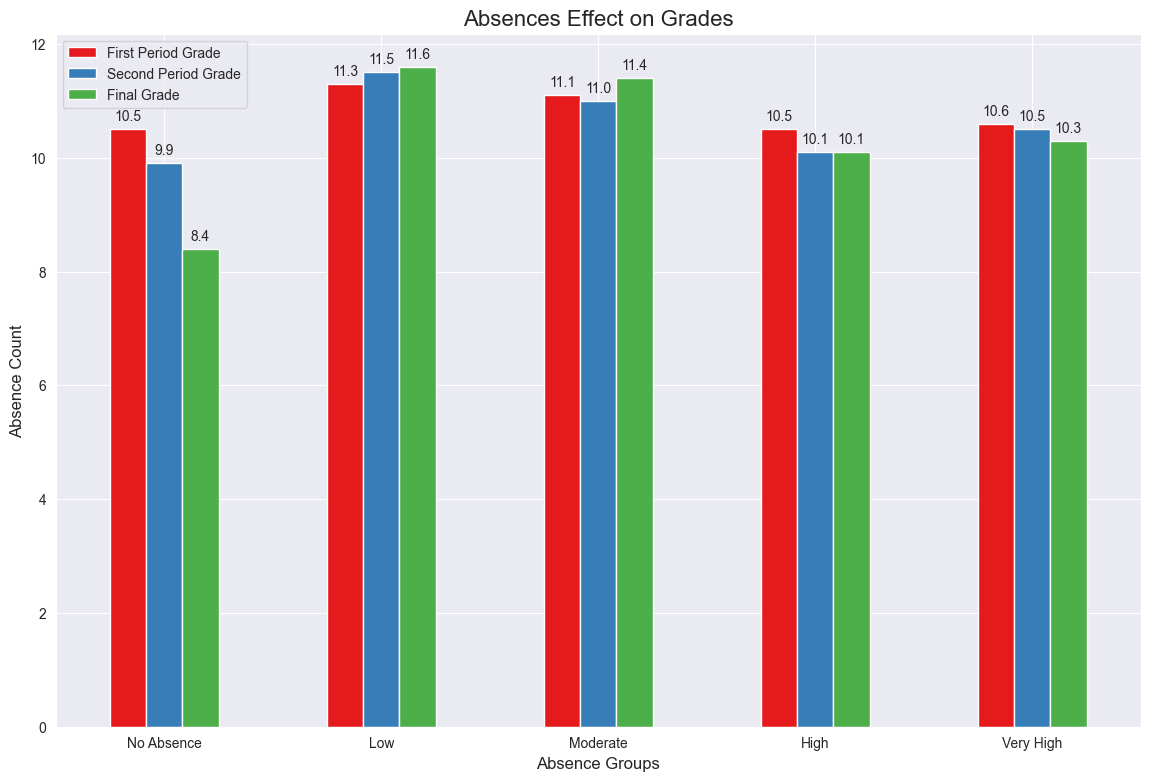

The pearson correlation coefficient is: 0.034
Very weak or no correlation: The variables do not have a meaningful linear relationship.


In [8]:
y = df.copy()

def absence_grouping(x):
    if x == 0:
        return 'No Absence'
    elif x <= 5:
        return 'Low'
    elif x <= 10:
        return 'Moderate'
    elif x <= 20:
        return 'High'
    else:
        return 'Very High'
    
y['Absence Groups'] = y['absences'].apply(absence_grouping)

x = y.groupby('Absence Groups')[['G1', 'G2', 'G3']].mean().round(1).reset_index()
x.columns = ['Absences', 'First Period Grade', 'Second Period Grade','Final Grade']

custom_order = ['No Absence', 'Low', 'Moderate', 'High', 'Very High']
x['Absences'] = pd.Categorical(x['Absences'], categories = custom_order, ordered=True)
x = x.sort_values('Absences')

plt.figure(figsize=(14,9))
colors = sns.color_palette('Set1')

ax = x.set_index('Absences').plot(kind='bar', color=colors, figsize=(14,9))

plt.title('Absences Effect on Grades', fontsize=16)
plt.xlabel('Absence Groups', fontsize=12)
plt.ylabel('Absence Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='best')

for i, bars in enumerate(ax.containers):  
    for bar in bars:
        height = bar.get_height()  
        ax.text(
            bar.get_x() + bar.get_width()/2,  
            height + 0.1,                     
            f"{height:.1f}",                  
            ha='center', va='bottom', fontsize=10
        )

plt.show()

z = df[['absences', 'G3']].corr()
corr_coff = z.iloc[0,1]
corr_coff = corr_coff.round(3)
print(Statistics.pearson_correlation_explain(corr_coff))

### Does Extra Support Help?

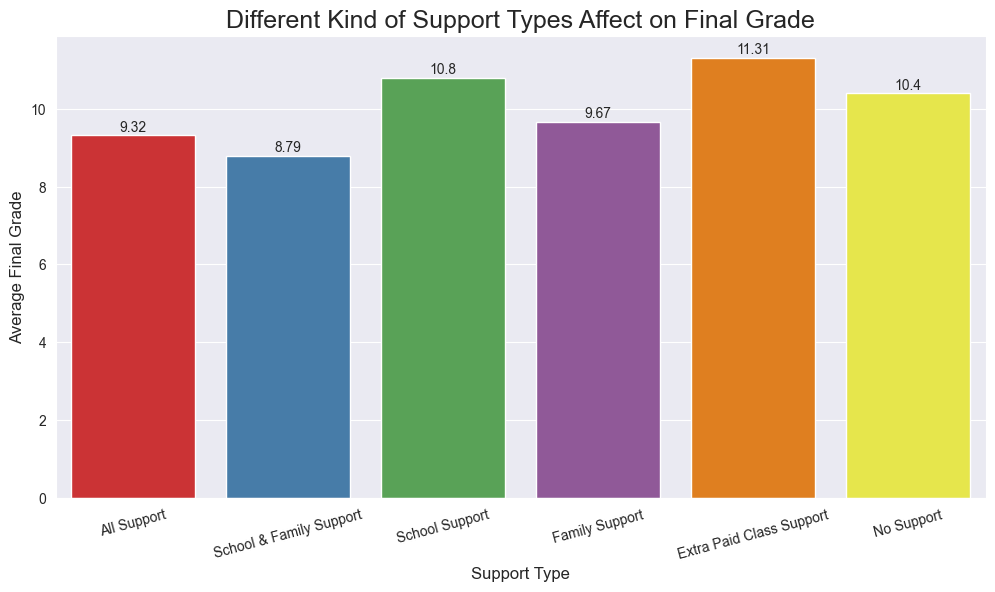

In [9]:
x = df[['schoolsup', 'famsup', 'paid', 'G3']]

## ALl help taken

all_average = x.query(
    "schoolsup == 'yes' and famsup == 'yes' and paid == 'yes'"
)['G3'].mean().round(3)

## Schoolsup and Famsup

schoolsup_famsup = x.query(
    "schoolsup == 'yes' and famsup == 'yes' and paid == 'no'"
)['G3'].mean().round(3)

## Schoolsup

schoolsup = x.query(
    "schoolsup == 'yes' and famsup == 'no' and paid == 'no'"
)['G3'].mean().round(3)

## Famsup

famsup = x.query(
    "schoolsup == 'no' and famsup == 'yes' and paid == 'no'"
)['G3'].mean().round(3)

## Paid

paid = x.query(
    "schoolsup == 'no' and famsup == 'no' and paid == 'yes'"
)['G3'].mean().round(3)

## No support at all

no_sup = x.query(
    "schoolsup == 'no' and famsup == 'no' and paid == 'no'"
)['G3'].mean().round(3)


categories = [
    'All Support', 'School & Family Support', 'School Support', 'Family Support', 'Extra Paid Class Support', 'No Support'
]

values = [all_average, schoolsup_famsup, schoolsup, famsup, paid, no_sup]

data = pd.DataFrame({"Support Type":categories, "Average Final Grade": values})

plt.figure(figsize=(12,6))
sns.barplot(x='Support Type', y='Average Final Grade', data=data, palette='Set1', hue='Support Type')

plt.title('Different Kind of Support Types Affect on Final Grade', fontsize=18)
plt.xlabel('Support Type',fontsize=12)
plt.ylabel('Average Final Grade', fontsize=12)
plt.xticks(rotation=15)

for i, v in enumerate(values):
    plt.text(i, v + 0.1 ,round(v,2), ha='center', fontsize=10)

plt.show()

### Do Students with Highly Educated Parents Score Better?

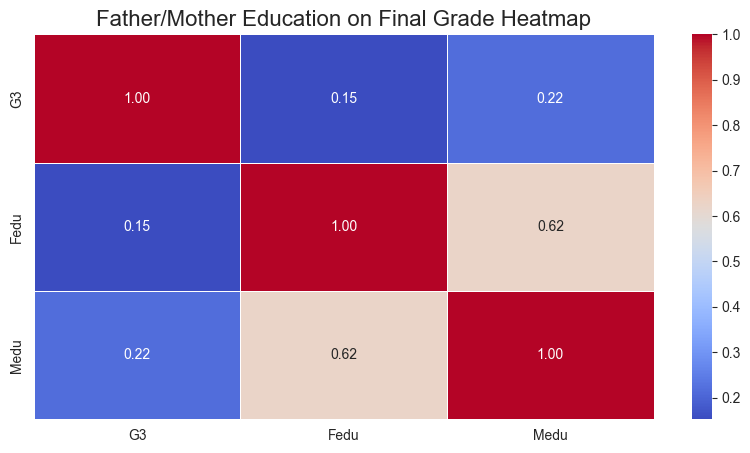

In [12]:
corr = df[['G3','Fedu', 'Medu']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Father/Mother Education on Final Grade Heatmap', fontsize=16)
plt.show()

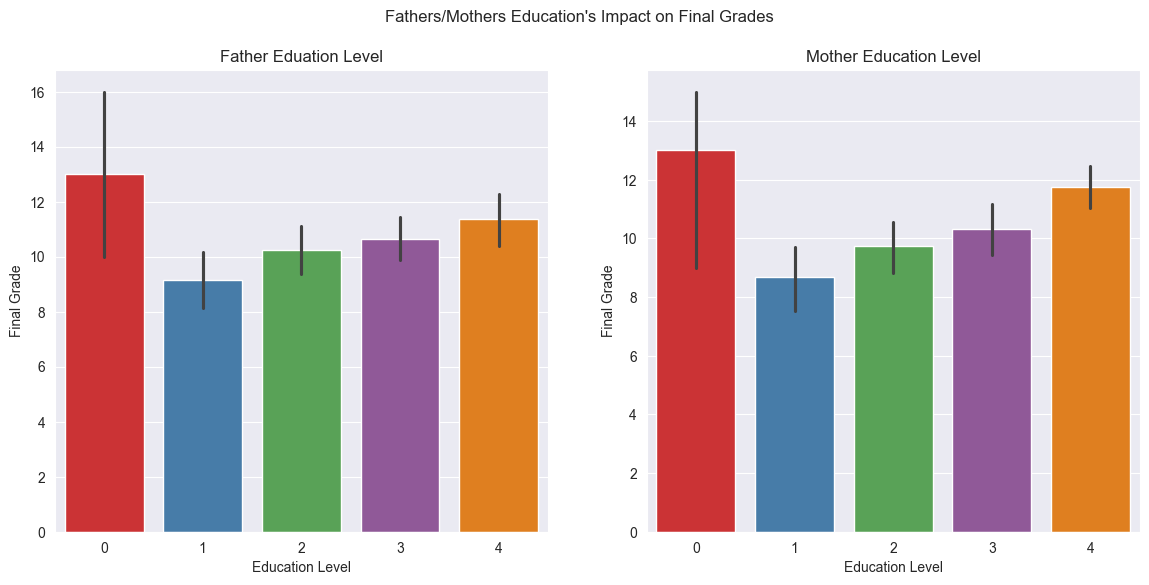


                     0:No Education     1:Primary Education     2:5th-9th Grade     3:Secondary Education     4:Higher Education
    



In [13]:
Fedu = df[['Fedu','G3']]
Medu = df[['Medu', 'G3']]

fig, axes = plt.subplots(1,2, figsize=(14,6))
fig.suptitle("Fathers/Mothers Education's Impact on Final Grades")

sns.barplot(ax=axes[0],  x='Fedu', y='G3', data=Fedu, hue='Fedu', legend=False, palette='Set1')
axes[0].set_title('Father Eduation Level')
axes[0].set_ylabel('Final Grade')
axes[0].set_xlabel('Education Level')

sns.barplot(ax=axes[1],  x='Medu', y='G3', data=Medu, hue='Medu', legend=False, palette='Set1')
axes[1].set_title('Mother Education Level')
axes[1].set_ylabel('Final Grade')
axes[1].set_xlabel('Education Level')

plt.show()

print("""
                     0:No Education     1:Primary Education     2:5th-9th Grade     3:Secondary Education     4:Higher Education
    
""")

### Alcohol Consumption vs Grades

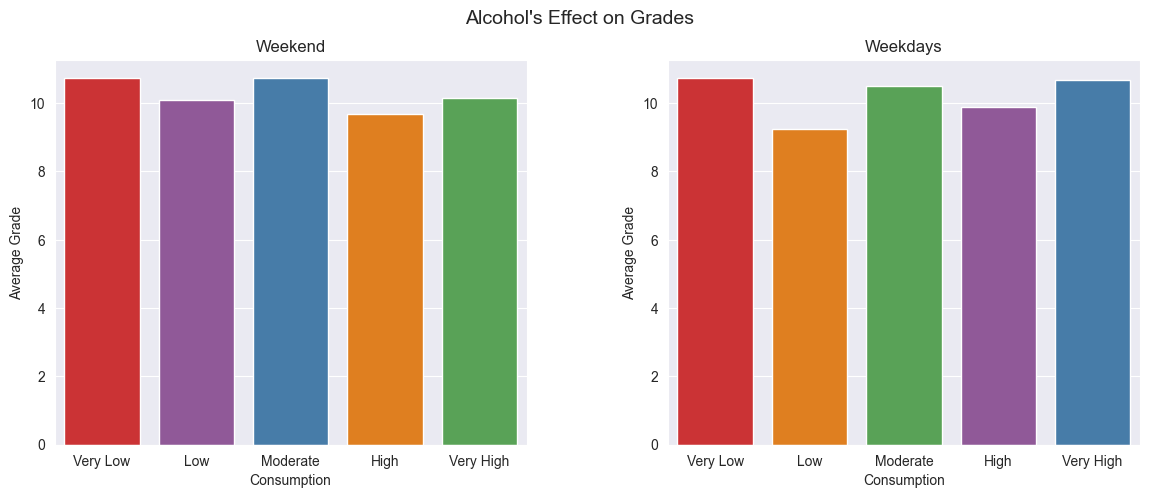

In [14]:
x = df.copy()

def walc(x):
    if x == 1:
        return 'Very Low'
    elif x == 2:
        return 'Low'
    elif x == 3:
        return 'Moderate'
    elif x == 4:
        return 'High'
    else:
        return 'Very High'
    
x['Walc'] = x['Walc'].apply(walc)
x['Dalc'] = x['Dalc'].apply(walc)

y = x.groupby('Walc')['G3'].mean().sort_values(ascending=False).reset_index()
z = x.groupby('Dalc')['G3'].mean().sort_values(ascending=False).reset_index()

custom_order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

fig, axes = plt.subplots(1,2, figsize=(14,5))
fig.suptitle("Alcohol's Effect on Grades", fontsize=14)
plt.subplots_adjust(wspace=0.3)

sns.barplot(ax=axes[0] ,x='Walc', y='G3', data=y, hue='Walc', palette='Set1', order=custom_order)
axes[0].set_title('Weekend')
axes[0].set_xlabel('Consumption')
axes[0].set_ylabel('Average Grade')

sns.barplot(ax=axes[1], x='Dalc', y='G3', data=z, hue='Dalc', palette='Set1', order=custom_order)
axes[1].set_title('Weekdays')
axes[1].set_xlabel('Consumption')
axes[1].set_ylabel('Average Grade')

plt.show()

#### Moving onto more statistical analysis with next part.